## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio Airbnb 🏠 🛋️

<center>
 <img src="https://thereverend.co.uk/blog/wp-content/uploads/2019/01/Air-Bnb-Logo-e1546550992454.png" width="80%" height="10%"> 
</center>

In [1]:
import pandas as pd
import numpy as np

In [2]:
bs_as = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-06-05/buenos_aires.csv')
bs_as.head()

,id,descripcion,id_anfitrion,nombre_anfitrion,anfitrion_desde,superanfitrion,barrio,latitud,longitud,tipo_alojamiento,precio,huespedes,politica_cancelacion
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,2009-05-26,False,Palermo,-34.58241,-58.43382,Alojamiento entero,1802,2,estricta_con_gracia
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,2009-10-01,False,Palermo,-34.58225,-58.42460,Alojamiento entero,2514,2,estricta_con_gracia
2,12463,Room in Recoleta - awesome location,48799,Matt,2009-10-28,False,Recoleta,-34.59761,-58.39468,Habitación privada,1005,1,moderada
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,2009-11-03,False,Palermo,-34.59382,-58.42994,Habitación privada,2304,2,estricta_con_gracia
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,2009-11-03,False,Palermo,-34.59398,-58.42853,Habitación privada,2304,2,estricta_con_gracia


In [3]:
filas_vacias = bs_as.loc[ bs_as.isna().sum(axis = 1) > 0, : ]
filas_vacias.shape

(14, 13)

In [4]:
bs_as.isnull().sum(axis=0)

id                       0
descripcion             11
id_anfitrion             0
nombre_anfitrion         3
anfitrion_desde          3
superanfitrion           3
barrio                   0
latitud                  0
longitud                 0
tipo_alojamiento         0
precio                   0
huespedes                0
politica_cancelacion     0
dtype: int64

In [9]:
print(f'Hay {len(bs_as.barrio.unique())} barrios en CABA')
print('\nEstos son los que mas propiedades en alquiler en Airbnb tienen\n')
print(bs_as.barrio.value_counts().head(16))

Hay 48 barrios en CABA

Estos son los que mas propiedades en alquiler en Airbnb tienen

Palermo          5647
Recoleta         3045
San Nicolas      1017
Retiro            953
Balvanera         870
Almagro           826
Belgrano          821
Monserrat         771
Villa Crespo      625
San Telmo         614
Colegiales        382
Caballito         378
Chacarita         348
Nuñez             346
Constitucion      267
Puerto Madero     223
Name: barrio, dtype: int64


In [13]:
# analicemos el barrio con mas propiedades
barrioMax = bs_as.barrio.value_counts().index[0]
barrio_df = bs_as.loc[bs_as.barrio == barrioMax]

barrio_df.tipo_alojamiento.value_counts()

Alojamiento entero       4660
Habitación privada        870
Habitación compartida     117
Name: tipo_alojamiento, dtype: int64

In [14]:
barrio_df.politica_cancelacion.value_counts()

flexible               2125
estricta_con_gracia    1963
moderada               1555
superestricta_60          3
superestricta_30          1
Name: politica_cancelacion, dtype: int64

In [16]:
precioMax = max(barrio_df.precio)
precioMin = min(barrio_df.precio)

precioMax, precioMin

(293268, 168)

<AxesSubplot:xlabel='tipo_alojamiento', ylabel='precio'>

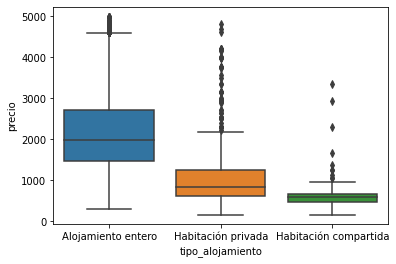

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

data = barrio_df.loc[ barrio_df['precio'] < 5000 ] #para evitar outliers
sns.boxplot(x='tipo_alojamiento', y='precio', data=data)

In [22]:
top3_barrios = bs_as.barrio.value_counts().index[:3]
top3_barrios_df = bs_as.loc[bs_as.barrio.isin(top3_barrios)]

top_anfitriones = top3_barrios_df.id_anfitrion.value_counts().index[:2]
top3_barrios_df.loc[top3_barrios_df.id_anfitrion.isin(top_anfitriones)]

,id,descripcion,id_anfitrion,nombre_anfitrion,anfitrion_desde,superanfitrion,barrio,latitud,longitud,tipo_alojamiento,precio,huespedes,politica_cancelacion
559,686484,Studio Apartment in Recoleta,3469227,Federico,2012-09-04,False,Recoleta,-34.59112,-58.40365,Alojamiento entero,2598,2,estricta_con_gracia
560,686486,Modern Apartment in Recoleta,3469227,Federico,2012-09-04,False,Recoleta,-34.59101,-58.40343,Alojamiento entero,2598,2,estricta_con_gracia
743,878184,Exclusive Recoleta Studio #RS92,4442974,RentinBA,2012-12-19,False,Recoleta,-34.58539,-58.39861,Alojamiento entero,3352,2,flexible
779,922367,Tranquil Studio in Recoleta #RS99,4442974,RentinBA,2012-12-19,False,Recoleta,-34.58452,-58.39887,Alojamiento entero,3352,2,estricta_con_gracia
1196,1649802,Sunny Studio in Palermo Chico #34,4442974,RentinBA,2012-12-19,False,Palermo,-34.58124,-58.40606,Alojamiento entero,3561,2,moderada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,33271243,Beautiful 1-bdrm apt in Palermo Hollywood #QD409,4442974,RentinBA,2012-12-19,False,Palermo,-34.57629,-58.43974,Alojamiento entero,5027,2,moderada
17927,33366231,Brand-New Apartment in Palermo Hollywood #QD206A,4442974,RentinBA,2012-12-19,False,Palermo,-34.57628,-58.43868,Alojamiento entero,5027,2,moderada
18007,33416076,Departamento en Palermo para 4 personas con Pa...,3469227,Federico,2012-09-04,False,Palermo,-34.58458,-58.41720,Alojamiento entero,4416,4,estricta_con_gracia
18292,33639163,Departamento en Palermo con Balcón.,3469227,Federico,2012-09-04,False,Palermo,-34.58639,-58.42288,Alojamiento entero,2639,2,estricta_con_gracia
